In [1]:
import torch
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch import Tensor as T, tensor as t

In [2]:
#Data of CO2 from AGC2019 and SIM_AGC2019 in 60 days
df_CO2=pd.read_csv('CO2-agc-sim-2019-60days.csv')
print (df_CO2.head())

        Unnamed: 0  co2_Air  co2_Out  sp_co2  sim_co2_Air  sim_co2_Out   
0  12/16/2019 0:00      509      410     400      509.000          410  \
1  12/16/2019 0:05      484      410     400      509.001          410   
2  12/16/2019 0:10      475      410     400      510.007          410   
3  12/16/2019 0:15      501      410     400      511.451          410   
4  12/16/2019 0:20      487      410     400      512.348          410   

   sim_sp_co2  
0         400  
1         400  
2         400  
3         400  
4         400  


In [3]:
#Climate data from AGC2019 and SIM_AGC2019 in 60 days
df_temp=pd.read_csv('temperature-agc-sim-2019-60days.csv')
print (df_temp.head())

            Unnamed: 0  T_Air  T_Out  T_Rail_Pipe  sp_heat  sim_T_Air   
0  2019-12-16 00:00:00   21.0    6.9         49.9     21.0    21.0000  \
1  2019-12-16 00:05:00   21.5    6.9         48.5     21.0    30.6972   
2  2019-12-16 00:10:00   21.6    6.9         46.8     21.0    28.4631   
3  2019-12-16 00:15:00   21.3    6.9         45.2     21.0    29.1980   
4  2019-12-16 00:20:00   21.4    6.7         43.8     21.0    28.2640   

   sim_T_Out  sim_T_Rail_Pipe  sim_sp_heat  
0        6.9          49.9000         21.0  
1        6.9          46.9826         21.0  
2        6.9          44.9656         21.0  
3        6.9          43.2148         21.0  
4        6.9          41.6818         21.0  


In [4]:
#CO2/Gas/Electric cost from AGC2019 in 60 days
df_data=pd.read_csv('datacost.csv')
print (df_data.head())

        Unnamed: 0  COST_co2_step  COST_gas_step  COST_electric_step
0  12/16/2019 0:00            0.0         0.0023                 0.0
1  12/16/2019 0:05            0.0         0.0016                 0.0
2  12/16/2019 0:10            0.0         0.0015                 0.0
3  12/16/2019 0:15            0.0         0.0019                 0.0
4  12/16/2019 0:20            0.0         0.0018                 0.0


In [5]:
#CO2/Gas/Electric cost from SIM_AGC2019 in 60 days
df_simc=pd.read_csv('simcost.csv')
print (df_simc.head())

        Unnamed: 0  sim_COST_co2_step  sim_COST_gas_step   
0  12/16/2019 0:00                0.0             0.0023  \
1  12/16/2019 0:05                0.0             0.0000   
2  12/16/2019 0:10                0.0             0.0000   
3  12/16/2019 0:15                0.0             0.0000   
4  12/16/2019 0:20                0.0             0.0000   

   sim_COST_electric_step  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  


In [6]:
#Full climate data of AGC2019 (received from Nam)
df_full=pd.read_csv('datafull.csv')
print (df_full.head())

         timestamp  co2_Air  humidity_deficit  T_Grow_Pipe  T_Rail_Pipe   
0  12/16/2019 0:00    509.0               8.8      21.0000         49.9  \
1  12/16/2019 0:05    484.0               9.2      21.0333         48.5   
2  12/16/2019 0:10    475.0               9.1      21.0711         46.8   
3  12/16/2019 0:15    501.0               8.5      21.0864         45.2   
4  12/16/2019 0:20    487.0               8.5      21.1073         43.8   

   T_Air  sp_co2  sp_humidity_deficit  sp_Grow_Pipe_min  sp_heat  ...   
0   21.0     400                  4.3                10     21.0  ...  \
1   21.5     400                  4.3                10     21.0  ...   
2   21.6     400                  4.3                10     21.0  ...   
3   21.3     400                  4.3                10     21.0  ...   
4   21.4     400                  4.3                10     21.0  ...   

   T_Soil_Ext     vp_Out     vp_Air  co2_Out  u_Roof_Vent  plant_density   
0    7.559241  801.94360  1290.713

In [7]:
x_CO2=np.array([df_CO2['co2_Air'],df_CO2['co2_Out'],df_CO2['sp_co2'],df_CO2['sim_co2_Air'],df_CO2['sim_co2_Out'],df_CO2['sim_sp_co2']]).T
x_temp=np.array([df_temp['T_Air'],df_temp['T_Out'],df_temp['T_Rail_Pipe'],df_temp['sp_heat'],df_temp['sim_T_Air'],df_temp['sim_T_Out'],df_temp['sim_T_Rail_Pipe'],df_temp['sim_sp_heat']]).T
x_datacost=np.array([df_data['COST_co2_step'],df_data['COST_gas_step'],df_data['COST_electric_step']]).T
x_simcost=np.array([df_simc['sim_COST_co2_step'],df_simc['sim_COST_gas_step'],df_simc['sim_COST_electric_step']]).T
x_full=np.array([df_full['sp_heat'],df_full['sp_humidity_deficit'],df_full['vp_Air'],df_full['T_Air'],df_full['sp_Rail_Pipe_min'],df_full['T_Rail_Pipe']]).T
print(x_CO2.shape,x_temp.shape,x_datacost.shape,x_simcost.shape,x_full.shape)

(17280, 6) (17280, 8) (17280, 3) (17280, 3) (47809, 6)


In [8]:
N, d=x_datacost.shape

In [9]:
cost_co2=np.zeros((N,1))
cost_gas=np.zeros((N,1))
cost_elec=np.zeros((N,1))
sim_cost_co2=np.zeros((N,1))
sim_cost_gas=np.zeros((N,1))
sim_cost_elec=np.zeros((N,1))
xaxs=np.zeros((N,1))
d1, d2 ,d3, d4, d5, d6 = 0, 0, 0, 0, 0, 0
for i in range (0,N):
    d1+=x_datacost[i,0]
    d2+=x_datacost[i,1]
    d3+=x_datacost[i,2]
    d4+=x_simcost[i,0]
    d5+=x_simcost[i,1]
    d6+=x_simcost[i,2]
    #Accumulated AGC2019 cost in 60 days
    cost_co2[i,0] =  d1
    cost_gas[i,0] =  d2
    cost_elec[i,0] =  d3
    #Accumulated SIM cost in 60 days
    sim_cost_co2[i,0] =  d4
    sim_cost_gas[i,0] =  d5
    sim_cost_elec[i,0] =  d6
    xaxs[i,0]=i

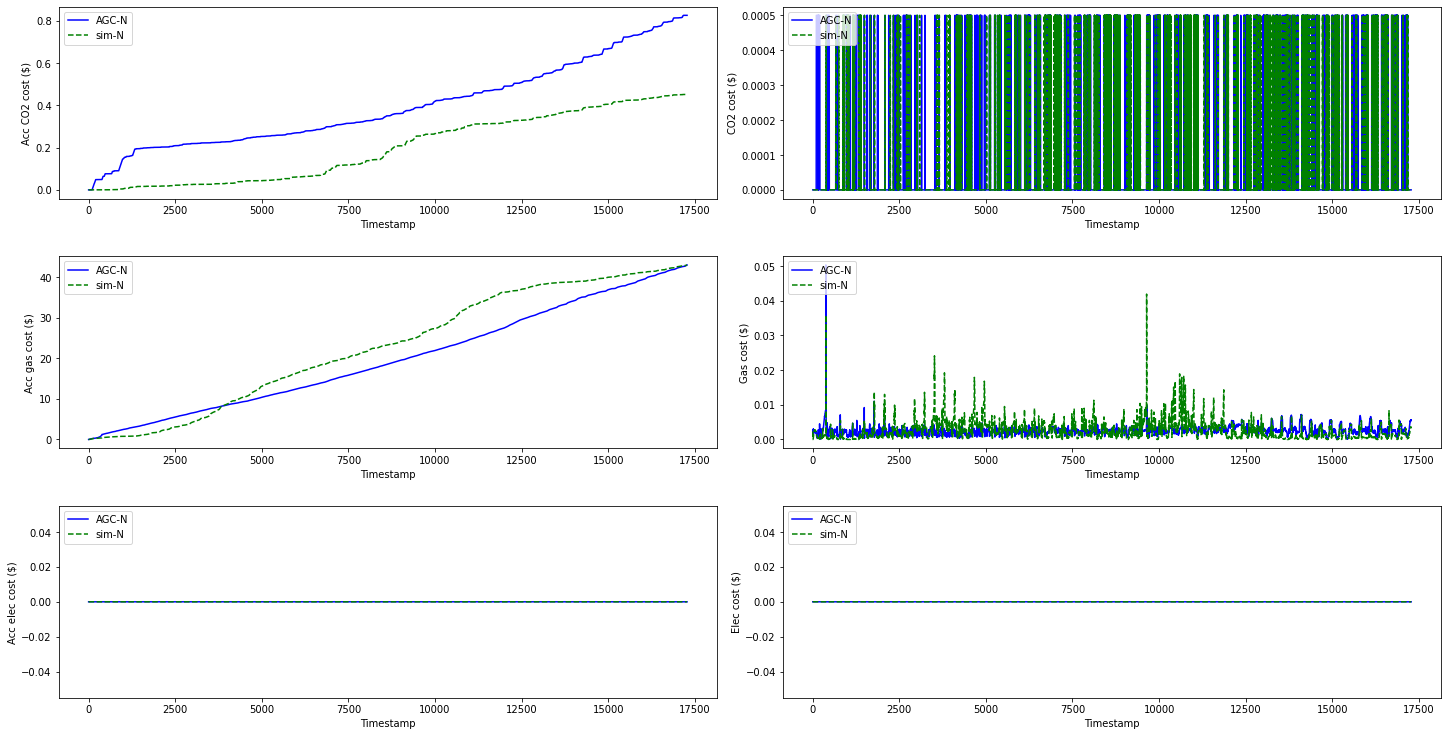

In [10]:
fig, axs=plt.subplots(nrows=3, ncols=2, figsize=(24,12))

axs[0,0].plot(xaxs,cost_co2[:,0], linestyle='-', color='b', label='AGC-N')
axs[0,0].plot(xaxs,sim_cost_co2[:,0], linestyle='--', color='g', label='sim-N')
axs[0,1].plot(xaxs,x_datacost[:,0], linestyle='-', color='b', label='AGC-N')
axs[0,1].plot(xaxs,x_simcost[:,0], linestyle='--', color='g', label='sim-N')
axs[1,0].plot(xaxs,cost_gas[:,0], linestyle='-', color='b', label='AGC-N')
axs[1,0].plot(xaxs,sim_cost_gas[:,0], linestyle='--', color='g', label='sim-N')
axs[1,1].plot(xaxs,x_datacost[:,1], linestyle='-', color='b', label='AGC-N')
axs[1,1].plot(xaxs,x_simcost[:,1], linestyle='--', color='g', label='sim-N')
axs[2,0].plot(xaxs,cost_elec[:,0], linestyle='-', color='b', label='AGC-N')
axs[2,0].plot(xaxs,sim_cost_elec[:,0], linestyle='--', color='g', label='sim-N')
axs[2,1].plot(xaxs,x_datacost[:,2], linestyle='-', color='b', label='AGC-N')
axs[2,1].plot(xaxs,x_simcost[:,2], linestyle='--', color='g', label='sim-N')
axs[0,0].set_xlabel('Timestamp')
axs[0,1].set_xlabel('Timestamp')
axs[1,0].set_xlabel('Timestamp')
axs[1,1].set_xlabel('Timestamp')
axs[2,0].set_xlabel('Timestamp')
axs[2,1].set_xlabel('Timestamp')
axs[0,0].set(ylabel='Acc CO2 cost ($)')
axs[1,0].set(ylabel='Acc gas cost ($)')
axs[2,0].set(ylabel='Acc elec cost ($)')
axs[0,1].set(ylabel='CO2 cost ($)')
axs[1,1].set(ylabel='Gas cost ($)')
axs[2,1].set(ylabel='Elec cost ($)')
axs[0,0].legend(loc='upper left')
axs[1,0].legend(loc='upper left')
axs[2,0].legend(loc='upper left')
axs[0,1].legend(loc='upper left')
axs[1,1].legend(loc='upper left')
axs[2,1].legend(loc='upper left')
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.1, hspace=0.3)
plt.show()

In [11]:
area=96 #m^2
timestamp=300 #s
co2_price=0.11 #0.66 #$/kg
# In AGH, this value is 15 g/m^2/h -> 15*1000*96/3600 = 400 mg/s
co2_capacity=2.6e-6 #kg/m^2/s
electric_capacity=0.0015625 #kWh/m^2 = (e_power=0.15 kWh)/area
electric_price=0.133 #$/kWh in US 2021

In [12]:
#Calculated cost based on the real data of AGC2019
x_cost_co2d=np.zeros((N,1))
x_cost_elecd=np.zeros((N,1))
cost_co2d=np.zeros((N,1))
cost_elecd=np.zeros((N,1))
d7=0
d8=0
for i in range (0,N):
    if x_CO2[i,2] > x_CO2[i,0] :
    #co2 sp > co2 air
        x_cost_co2d[i,0]=co2_capacity*area*timestamp*co2_price
    else : x_cost_co2d[i,0]=0
    d7+=x_cost_co2d[i,0]
    cost_co2d[i,0]=d7
    if x_temp[i,2] > x_temp[i,0] :
    #T_pipe > T_Air boiler run
        x_cost_elecd[i,0]=electric_capacity*area*timestamp*electric_price/3600
    else : x_cost_elecd[i,0]=0
    d8+=x_cost_elecd[i,0]
    cost_elecd[i,0]=d8

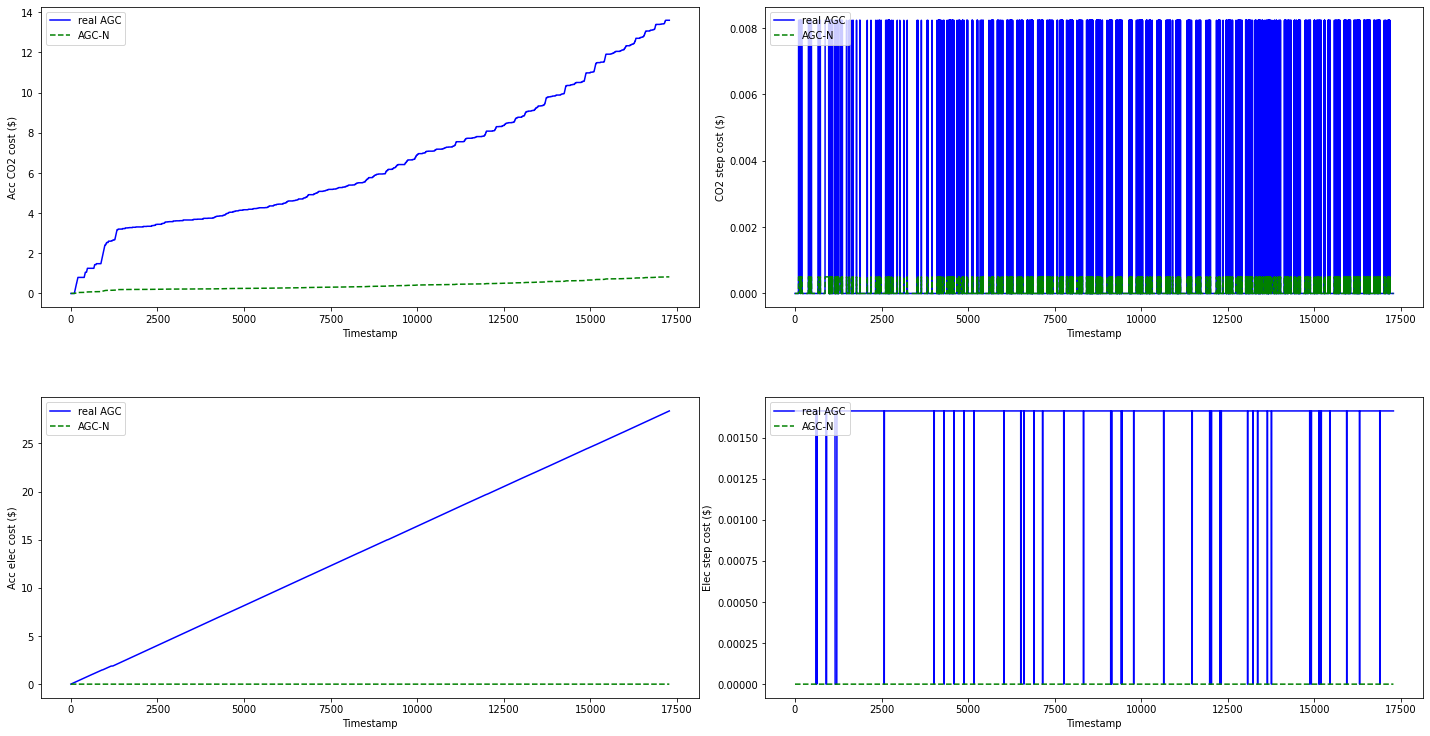

In [13]:
fig, axs=plt.subplots(nrows=2, ncols=2, figsize=(24,12))

axs[0,0].plot(xaxs,cost_co2d[:,0], linestyle='-', color='b', label='real AGC')
axs[0,0].plot(xaxs,cost_co2[:,0], linestyle='--', color='g', label='AGC-N')
axs[0,1].plot(xaxs,x_cost_co2d[:,0], linestyle='-', color='b', label='real AGC')
axs[0,1].plot(xaxs,x_datacost[:,0], linestyle='--', color='g', label='AGC-N')
axs[1,0].plot(xaxs,cost_elecd[:,0], linestyle='-', color='b', label='real AGC')
axs[1,0].plot(xaxs,cost_elec[:,0], linestyle='--', color='g', label='AGC-N')
axs[1,1].plot(xaxs,x_cost_elecd[:,0], linestyle='-', color='b', label='real AGC')
axs[1,1].plot(xaxs,x_datacost[:,2], linestyle='--', color='g', label='AGC-N')
axs[0,0].set_xlabel('Timestamp')
axs[0,1].set_xlabel('Timestamp')
axs[1,0].set_xlabel('Timestamp')
axs[1,1].set_xlabel('Timestamp')
axs[0,0].set(ylabel='Acc CO2 cost ($)')
axs[1,0].set(ylabel='Acc elec cost ($)')
axs[0,1].set(ylabel='CO2 step cost ($)')
axs[1,1].set(ylabel='Elec step cost ($)')
axs[0,0].legend(loc='upper left')
axs[1,0].legend(loc='upper left')
axs[0,1].legend(loc='upper left')
axs[1,1].legend(loc='upper left')
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.1, hspace=0.3)
plt.show()

In [14]:
VP_SAT_PRE_EXP = 610.78
VP_SAT_EXP_COEF = 17.27
VP_SAT_TEMP_COEF = 237.3
# Molar mass of water.
# Unit: kg kmol^-1
M_WATER = 18.01528
KILO = 1.0E3
GAS_R = 8.314462E3  # Molar gas constant R in ideal gas law: PV=nRT [J/kmol/K]
GAS_R_MOL = GAS_R / KILO  # [J/mol/K]
# Reference temperature for calculating air density
# default = 25 [Celsius]
AIR_DENSITY_TEMP = 25.0
K0 = 273.15  # absolute temperature at 0C
APPROX_TEMPERATURE_KELVIN = K0 + AIR_DENSITY_TEMP  # default temperature used in linear approximations
# conversion factor from pascal to g/m3
PASCAL_TO_GM3 = M_WATER / (GAS_R_MOL * APPROX_TEMPERATURE_KELVIN)
# Density of steel.
# Unit: kg m^-3
STEEL_DENSITY = 7850
# Density of water.
# Unit: kg m^-3
WATER_DENSITY = 1E3
# Density of the air at sea level.
# Unit: kg m^-3
DENSITY_AIR0 = 1.20
# Specific heat capacities of materials: https://en.wikipedia.org/wiki/Table_of_specific_heat_capacities
# Unit: J/K/kg
HEAT_CAPACITY_AIR = 1E3
HEAT_CAPACITY_WATER = 4.18E3
HEAT_CAPACITY_STEEL = 0.64E3

In [15]:
def vp_saturation_inverse (
    vp_sat: np, _VP_SAT_PRE_EXP=np.array(VP_SAT_PRE_EXP), _VP_SAT_EXP_COEF=np.array(VP_SAT_EXP_COEF),
    _VP_SAT_TEMP_COEF=np.array(VP_SAT_TEMP_COEF) ) -> np:  # Celsius
    
#   ref: https://en.wikipedia.org/wiki/Tetens_equation
    c = np.log(vp_sat / _VP_SAT_PRE_EXP)
    
    return c * _VP_SAT_TEMP_COEF / (_VP_SAT_EXP_COEF - c)

In [16]:
def proportional_control (
#   sp: T, cur: T, band: T, direction: T = t(1) ) -> T:
    sp: T, cur: T, band: T, direction: T = torch.tensor(1.) ) -> T:
# direction is positive if we need to increase cur to sp (e.g. heating) and negative otherwise (ventilation)
    diff = torch.tensor(sp - cur) * direction
# return torch.clip(diff / band, 0, 1)  # we assume the output of proportional control is always between 0 and 1
    return soft_zero_one_clip(diff / band, temperature=t(7.))
# smooth control function
def soft_zero_one_clip ( x, temperature=torch.tensor(4.0) ):
    return torch.sigmoid((x - 0.5) * temperature)

In [17]:
diameter_external= 0.089  # [m] HEC_pipe_air = 11.3 * 3.14 * 0.089 / 1.5 = 2.1 W/m2{gh}/K
diameter_internal= 0.084  # [m]
distance_between_pipes= 1.5 # [m]
boiler_capacity=180 #Wh/m^2
thermal_efficiency =0.85
fuel_efficiency=31.65e6 #[J/m^3]
fuel_price=0.41 #[$/m^2]
air_height= 4.5  # [m]

In [18]:
def heat_capacity ():

#   Equation 8.22:
    thickness = (diameter_external - diameter_internal) / 2
    steel_heat_cap = thickness * surface_area() * STEEL_DENSITY * HEAT_CAPACITY_STEEL
    water_volume = math.pi * (diameter_internal / 2) ** 2 / distance_between_pipes
    water_heat_cap = water_volume * WATER_DENSITY * HEAT_CAPACITY_WATER
    
    return steel_heat_cap + water_heat_cap

In [19]:
def surface_area():

#   returns both the surface area and the view area
    surface_area = math.pi * diameter_external  # per 1m length
    surface_area_normalized = surface_area / distance_between_pipes  # normalize per 1m2 of floor
    
    return surface_area_normalized

In [20]:
def compute_fuel_consumption ( 
    sp_Rail_Pipe_min, sp_heat, sp_humidity_deficit, vp_Air, T_Air, T_Rail_Pipe ) -> np:
    
    cap_air = air_height * HEAT_CAPACITY_AIR * DENSITY_AIR0
    power = boiler_capacity
    band_air = power * timestamp / cap_air
    band_pipe = power * timestamp / heat_capacity()
    sp_pipe, sp_heat, sp_hum_def = sp_Rail_Pipe_min, sp_heat, sp_humidity_deficit
# take into account heat loss due to ventilating dehumidification
    sp_vp = vp_Air + sp_hum_def / PASCAL_TO_GM3
    sp_heat = np.maximum( sp_heat, vp_saturation_inverse(sp_vp) )
    u_air  = proportional_control ( sp_heat, T_Air,       band_air )
    u_pipe = proportional_control ( sp_pipe, T_Rail_Pipe, band_pipe )
    u = np.maximum( np.array(u_air), np.array(u_pipe) )    
    
    return u
    #return fuel_price * u * boiler_capacity*area * timestamp/ (fuel_efficiency * thermal_efficiency)

In [21]:
gas_cost = (np.array([compute_fuel_consumption(
    sp_Rail_Pipe_min=x_full[:N,4], 
    sp_heat=x_full[:N,0], 
    sp_humidity_deficit=x_full[:N,1],
    vp_Air=x_full[:N,2], 
    T_Air=x_full[:N,3], 
    T_Rail_Pipe=x_full[:N,5] )]).T)*fuel_price* boiler_capacity*area * timestamp/ (fuel_efficiency * thermal_efficiency)
elec_cost=(np.array([compute_fuel_consumption(
    sp_Rail_Pipe_min=x_full[:N,4], 
    sp_heat=x_full[:N,0], 
    sp_humidity_deficit=x_full[:N,1],
    vp_Air=x_full[:N,2], 
    T_Air=x_full[:N,3], 
    T_Rail_Pipe=x_full[:N,5] )]).T)*x_cost_elecd

In [22]:
gas_costa=np.zeros((N,1))
elec_costa=np.zeros((N,1))
d9=0
d10=0
for i in range (0,N):
    d9+=gas_cost[i,0]
    d10+=elec_cost[i,0]
    gas_costa[i,0]=d9
    elec_costa[i,0]=d10
print(elec_costa)

[[4.87315836e-05]
 [8.33720064e-05]
 [1.15716084e-04]
 ...
 [8.92998606e-01]
 [8.93114409e-01]
 [8.93231333e-01]]


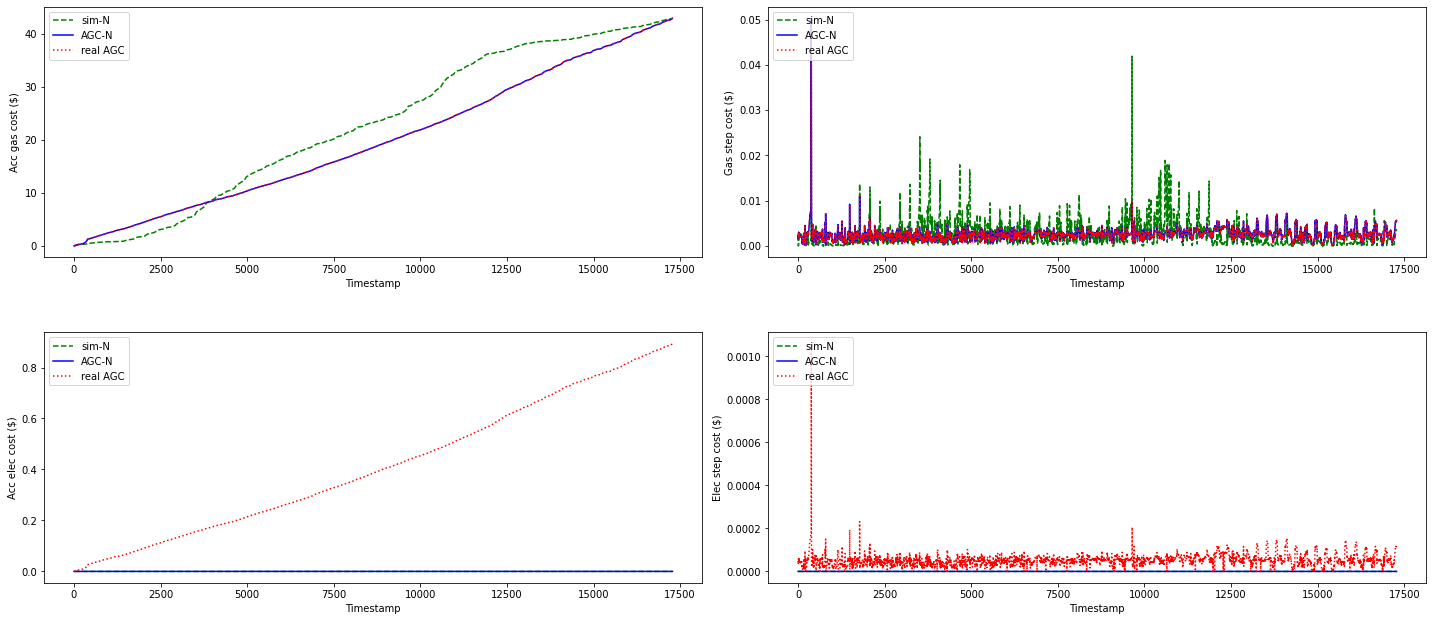

In [23]:
fig, axs=plt.subplots(nrows=2, ncols=2, figsize=(24,10))

axs[0,0].plot(xaxs,sim_cost_gas[:,0], linestyle='--', color='g', label='sim-N')
axs[0,0].plot(xaxs,cost_gas, linestyle='-', color='b', label='AGC-N')
axs[0,0].plot(xaxs,gas_costa[:,0], linestyle='dotted', color='r', label='real AGC')
axs[0,1].plot(xaxs,x_simcost[:,1], linestyle='--', color='g', label='sim-N')
axs[0,1].plot(xaxs,x_datacost[:,1], linestyle='-', color='b', label='AGC-N')
axs[0,1].plot(xaxs,gas_cost, linestyle='dotted', color='r', label='real AGC')

axs[1,0].plot(xaxs,sim_cost_elec[:,0], linestyle='--', color='g', label='sim-N')
axs[1,0].plot(xaxs,cost_elec, linestyle='-', color='b', label='AGC-N')
axs[1,0].plot(xaxs,elec_costa[:,0], linestyle='dotted', color='r', label='real AGC')
axs[1,1].plot(xaxs,x_simcost[:,2], linestyle='--', color='g', label='sim-N')
axs[1,1].plot(xaxs,x_datacost[:,2], linestyle='-', color='b', label='AGC-N')
axs[1,1].plot(xaxs,elec_cost, linestyle='dotted', color='r', label='real AGC')

axs[0,0].set_xlabel('Timestamp')
axs[0,1].set_xlabel('Timestamp')
axs[1,0].set_xlabel('Timestamp')
axs[1,1].set_xlabel('Timestamp')
axs[0,0].set(ylabel='Acc gas cost ($)')
axs[0,1].set(ylabel='Gas step cost ($)')
axs[1,0].set(ylabel='Acc elec cost ($)')
axs[1,1].set(ylabel='Elec step cost ($)')
axs[0,0].legend(loc='upper left')
axs[0,1].legend(loc='upper left')
axs[1,0].legend(loc='upper left')
axs[1,1].legend(loc='upper left')
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.1, hspace=0.3)
plt.show()